In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (16, 8)  #set default figure size
import os
import sys
from PEMFC_project import _samplings , _equivalent_circuits, _reconstruct_Nyquist_plot,_data_summery 
import time
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, DotProduct, ConstantKernel as C

In [5]:
correct_2d2 = pd.read_excel('Data/correct_2d2.xlsx',sheet_name=0, header=None,index_col=0)
correct_2d2_param = pd.read_excel('Data/correct_2d2.xlsx',sheet_name=1, header=None,index_col=0)


In [7]:
result= pd.read_excel('Data/PEMFC_case_study.xlsx',sheet_name=0, header=0,index_col=0)
result

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.003465,0.003065,0.002843,0.002654,0.002537,0.002482,0.002477,0.002506,0.002562,0.002649,...,0.002599,0.002378,0.001941,0.001369,0.000644,0.000441,0.000092,-0.000227,-0.000410,-0.000501
1,0.002840,0.002359,0.002144,0.001927,0.001790,0.001724,0.001720,0.001753,0.001816,0.001912,...,0.003425,0.003115,0.002673,0.001820,0.000888,0.000535,-0.000011,-0.000368,-0.000555,-0.000651
2,0.002374,0.002380,0.002388,0.002400,0.002417,0.002442,0.002479,0.002534,0.002615,0.002734,...,0.001907,0.001687,0.001329,0.000954,0.000641,0.000424,0.000267,0.000174,0.000112,0.000070
3,0.002624,0.002626,0.002628,0.002631,0.002637,0.002645,0.002659,0.002682,0.002721,0.002786,...,0.001806,0.001464,0.001058,0.000714,0.000465,0.000301,0.000193,0.000123,0.000078,0.000050


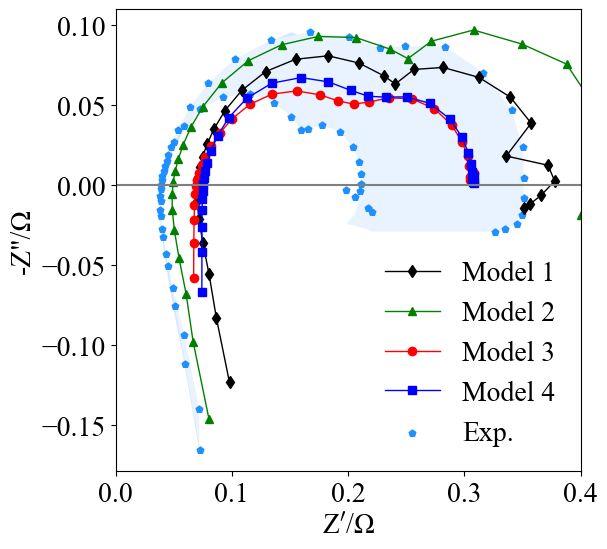

In [8]:

colors = ['k','g','r','b']
markers = ['d','^','o','s']
labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
plt.figure(figsize=(6,6))
palette = sns.color_palette("bright", 4)
for i in range(4):

    plt.plot(result.iloc[i,:31]*28.3, result.iloc[i,31:]*28.3,marker=markers[i],linewidth=1, label=labels[i],  c=colors[i])

    
plt.xticks(np.linspace(0,0.5,6),fontsize=20)
plt.yticks(fontsize=20)#np.linspace(-5e-3,4e-3,5)
plt.ylabel('-Z"/Ω', fontsize=20)
plt.xlabel('Z${\'}$/Ω', fontsize=20)

#plt.ylim([-2,1.5])
plt.xlim([0,0.4])
plt.plot(np.linspace(0,0.5,5), np.zeros(5),'-',c='grey')
plt.fill_between(correct_2d2.iloc[11,:27]*28.3, correct_2d2.iloc[11,31:-4]*28.3 ,
                correct_2d2.iloc[5,31:-4]*28.3, color='dodgerblue', alpha=0.1,edgecolor=None)
plt.fill_betweenx(correct_2d2.iloc[5,31:]*28.3, correct_2d2.iloc[11,:31]*28.3 ,
                 correct_2d2.iloc[5,:31]*28.3, color='dodgerblue', alpha=0.1 ,edgecolor=None,interpolate=False)
#for i in [1,5,3,2,9]:
plt.scatter(correct_2d2.iloc[11,:31]*28.3, correct_2d2.iloc[11,31:]*28.3,linewidth=1,c='dodgerblue',
             marker='p',s=25,label='Exp.')
plt.scatter(correct_2d2.iloc[5,:31]*28.3, correct_2d2.iloc[5,31:]*28.3,linewidth=1,c='dodgerblue',
             marker='p',s=25,label=None)
plt.legend(markerscale=1,frameon=False, fontsize=20)